# **WebScrapping Corona Virus Data & Visualization **

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from prettytable import PrettyTable

In [15]:
#Fetching the data from Website & parsing the content(HTML) 
address='https://www.mohfw.gov.in/'
data=requests.get(address).content
soup=BeautifulSoup(data,"html.parser")
print(soup)


<!DOCTYPE doctype html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>MoHFW | Home</title>
<link href="assets/images/favicon.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="assets/css/base.css" rel="stylesheet" type="text/css"/>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-162536712-2"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-162536712-2');
</script>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_config||{},a.BOOMR

In [3]:
soup = BeautifulSoup(str(soup).replace("<!--<tbody>", "<tbody>"), "html.parser")
print(soup)

<!DOCTYPE doctype html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>MoHFW | Home</title>
<link href="assets/images/favicon.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="assets/css/base.css" rel="stylesheet" type="text/css"/>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-162536712-2"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-162536712-2');
</script>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_config||{},a.BOOMR

In [6]:
  # remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
# find all table rows and data cells within
tbody = soup.find_all('tbody')[-1]

stats = [] 
all_rows = soup.find_all('tr')
counter=1
for row in all_rows:
    if(counter>35):
      break;
    stat = extract_contents(row.find_all('td')) 
    
# notice that the data that we require is now a list of length 5
    if len(stat) == 5:
        stats.append(stat)
        counter=counter+1
        print(stat)


    
    


['1', 'Andaman and Nicobar Islands', '47', '133', '0']
['2', 'Andhra Pradesh', '18159', '19393', '492']
['3', 'Arunachal Pradesh', '387', '153', '3']
['4', 'Assam', '6818', '12888', '48']
['5', 'Bihar', '7549', '14018', '197']
['6', 'Chandigarh', '164', '476', '11']
['7', 'Chhattisgarh', '1260', '3451', '21']
['8', 'Dadra and Nagar Haveli and Daman and Diu', '179', '371', '2']
['9', 'Delhi', '17407', '97693', '3545']
['10', 'Goa', '1272', '1817', '19']
['11', 'Gujarat', '11289', '32103', '2089']
['12', 'Haryana', '5495', '18185', '322']
['13', 'Himachal Pradesh', '382', '984', '11']
['14', 'Jammu and Kashmir', '5488', '6446', '222']
['15', 'Jharkhand', '2069', '2513', '42']
['16', 'Karnataka', '30661', '19729', '1032']
['17', 'Kerala', '5376', '4862', '37']
['18', 'Ladakh', '176', '970', '1']
['19', 'Madhya Pradesh', '5562', '14127', '689']
['20', 'Maharashtra', '114947', '158140', '11194']
['21', 'Manipur', '635', '1129', '0']
['22', 'Meghalaya', '309', '66', '2']
['23', 'Mizoram', '1

In [7]:
print(stats)

[['1', 'Andaman and Nicobar Islands', '47', '133', '0'], ['2', 'Andhra Pradesh', '18159', '19393', '492'], ['3', 'Arunachal Pradesh', '387', '153', '3'], ['4', 'Assam', '6818', '12888', '48'], ['5', 'Bihar', '7549', '14018', '197'], ['6', 'Chandigarh', '164', '476', '11'], ['7', 'Chhattisgarh', '1260', '3451', '21'], ['8', 'Dadra and Nagar Haveli and Daman and Diu', '179', '371', '2'], ['9', 'Delhi', '17407', '97693', '3545'], ['10', 'Goa', '1272', '1817', '19'], ['11', 'Gujarat', '11289', '32103', '2089'], ['12', 'Haryana', '5495', '18185', '322'], ['13', 'Himachal Pradesh', '382', '984', '11'], ['14', 'Jammu and Kashmir', '5488', '6446', '222'], ['15', 'Jharkhand', '2069', '2513', '42'], ['16', 'Karnataka', '30661', '19729', '1032'], ['17', 'Kerala', '5376', '4862', '37'], ['18', 'Ladakh', '176', '970', '1'], ['19', 'Madhya Pradesh', '5562', '14127', '689'], ['20', 'Maharashtra', '114947', '158140', '11194'], ['21', 'Manipur', '635', '1129', '0'], ['22', 'Meghalaya', '309', '66', '2'

In [8]:
cols = ["Sr.No", "States","Confirmed Cases","Recovered","Deceased"]
state_data=pd.DataFrame(data=stats,columns=cols)


In [9]:
state_data.head()

,Sr.No,States,Confirmed Cases,Recovered,Deceased
0,1,Andaman and Nicobar Islands,47,133,0
1,2,Andhra Pradesh,18159,19393,492
2,3,Arunachal Pradesh,387,153,3
3,4,Assam,6818,12888,48
4,5,Bihar,7549,14018,197


In [10]:
#Converting Scrapped Data items in to INT
state_data['Confirmed Cases'] = pd.to_numeric(state_data['Confirmed Cases'])
state_data['Recovered'] = pd.to_numeric(state_data['Recovered'])
state_data['Deceased'] =  pd.to_numeric(state_data['Deceased']) 

In [11]:
#Pretty Table Representation of State Data
table = PrettyTable()
table.field_names = (cols)
for category in stats:
    
    table.add_row(category)

table.add_row(["","Total", 
               sum(state_data['Confirmed Cases']), 
               25056,
               9843])
print(table)

+-------+------------------------------------------+-----------------+-----------+----------+
| Sr.No |                  States                  | Confirmed Cases | Recovered | Deceased |
+-------+------------------------------------------+-----------------+-----------+----------+
|   1   |       Andaman and Nicobar Islands        |        47       |    133    |    0     |
|   2   |              Andhra Pradesh              |      18159      |   19393   |   492    |
|   3   |            Arunachal Pradesh             |       387       |    153    |    3     |
|   4   |                  Assam                   |       6818      |   12888   |    48    |
|   5   |                  Bihar                   |       7549      |   14018   |   197    |
|   6   |                Chandigarh                |       164       |    476    |    11    |
|   7   |               Chhattisgarh               |       1260      |    3451   |    21    |
|   8   | Dadra and Nagar Haveli and Daman and Diu |       1

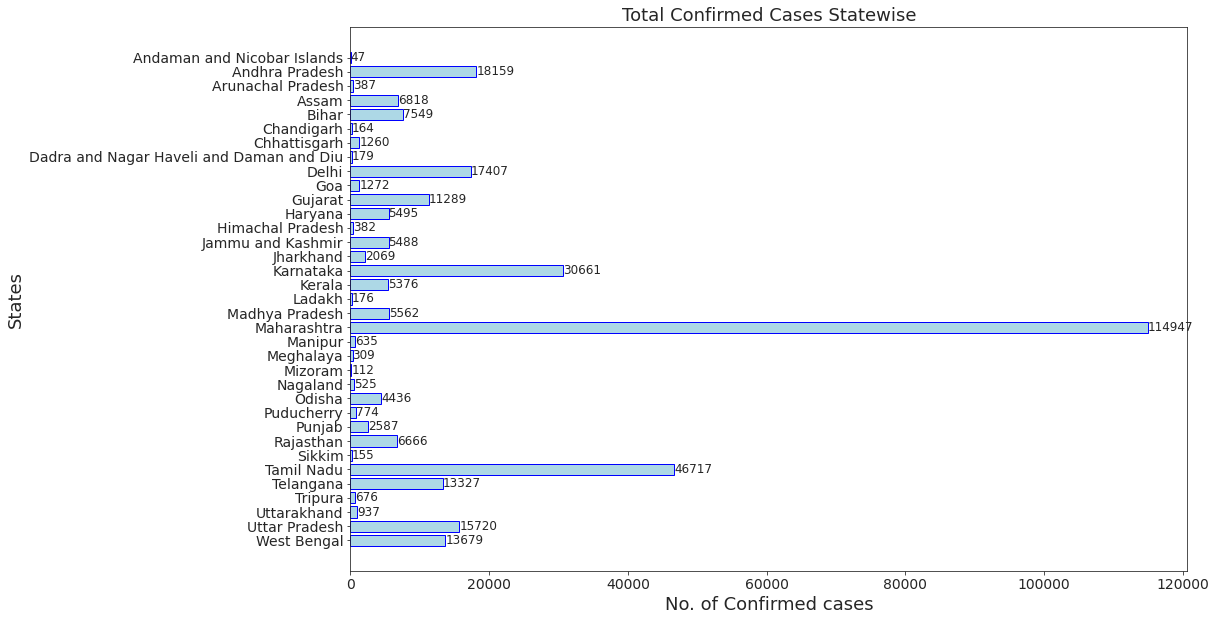

In [12]:
#BarChart Visualization of the Confirmed Cases
sns.set_style("ticks")
plt.figure(figsize=(15,10))
plt.barh(state_data["States"],state_data["Confirmed Cases"].map(int),align='center',color='lightblue',edgecolor='blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 18 )


for index, value in enumerate(state_data["Confirmed Cases"]):
    plt.text(value, index, str(value), fontsize = 12, verticalalignment = 'center')
plt.show() 

In [13]:
#Exporting Dataframe as CSV
from google.colab import files
state_data.to_csv('covid_data.csv')
files.download('covid_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>